<a href="https://colab.research.google.com/github/PeterPirog/tensorflow-deep-learning/blob/workspace/01_regression_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.random.set_seed(42)

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df=pd.pandas.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
df_oh=pd.get_dummies(df,
                  dummy_na=False,
                  drop_first=True)
df_oh.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [3]:
#Prepare X and y values
X=df_oh.drop('charges',axis=1)
y=df_oh['charges']
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [5]:
# 1. Create model

model=tf.keras.Sequential(name='Model1')
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10,name='Dense1'))
model.add(tf.keras.layers.Dense(1,name='Output'))

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])


In [6]:
callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                factor=0.1,
                                                patience=10),
           tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=1)
           
]

In [7]:
from sklearn.utils import shuffle
#3. Model fit
history=model.fit(X_train,y_train,epochs=100,
          validation_split=0.1,
          shuffle=True,
          callbacks=callbacks)
#model.summary()

Epoch 1/100
31/31 [==============================] - 2s 22ms/step - loss: 13461.4043 - mae: 13461.4043 - val_loss: 12281.8027 - val_mae: 12281.8027 - lr: 0.0100
Epoch 2/100
31/31 [==============================] - 0s 10ms/step - loss: 13431.8047 - mae: 13431.8047 - val_loss: 12230.1973 - val_mae: 12230.1973 - lr: 0.0100
Epoch 3/100
31/31 [==============================] - 0s 9ms/step - loss: 13311.3779 - mae: 13311.3779 - val_loss: 12039.2158 - val_mae: 12039.2158 - lr: 0.0100
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 12994.2959 - mae: 12994.2959 - val_loss: 11578.2920 - val_mae: 11578.2920 - lr: 0.0100
Epoch 5/100
31/31 [==============================] - 0s 10ms/step - loss: 12355.3105 - mae: 12355.3105 - val_loss: 10725.6963 - val_mae: 10725.6963 - lr: 0.0100
Epoch 6/100
31/31 [==============================] - 0s 8ms/step - loss: 11325.9805 - mae: 11325.9805 - val_loss: 9589.6738 - val_mae: 9589.6738 - lr: 0.0100
Epoch 7/100
31/31 [===================

In [8]:
print(history.history.keys())
#pd.DataFrame(history.history).plot()
#plt.ylabel("loss")
#plt.xlabel("epochs")
acc=history.history['mae']
val_acc=history.history['val_mae']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

dict_keys(['loss', 'mae', 'val_loss', 'val_mae', 'lr'])


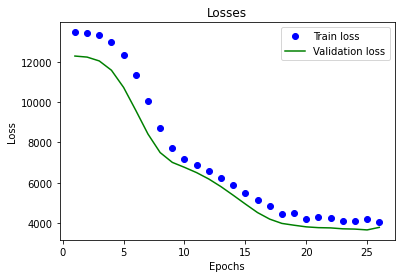

In [9]:
plt.plot(epochs,loss,'bo',label='Train loss')
plt.plot(epochs,val_loss,'g',label='Validation loss')
plt.title('Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [10]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3573.8843 - mae: 3573.8843


[3573.88427734375, 3573.88427734375]

In [11]:
#plt.scatter(X,y)
#plt.show

### Prepare 3 sets

* train -70-80 %
* val 10-15 %
* test 10-15 %


In [12]:
### How many samples we have
#print(len(X))

In [13]:
def split_dataset(X,y,val_size=0.2,test_size=0.1,shuffle=True,random_state=42):
  N=len(X)
  train_size=1.0-test_size-val_size
  N_train=N*train_size
  N_val=N*val_size
  N_test=N*test_size

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state,shuffle=shuffle)
  
  corrected_val_size=N_val/(N_val+N_train) # corrected value is scaled cause of the first split

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=corrected_val_size, random_state=random_state,shuffle=shuffle)

  return X_train,X_val, X_test, y_train, y_val, y_test


In [14]:
def plot_predictions(X_test=X_test,y_test=y_test, y_pred=y_pred):
  plt.figure(figsize=(10,7))


  # Plot training data in blue
  plt.scatter(X_test,y_test,c='g',label='Test data')

  # Plot training data in blue
  plt.scatter(X_test,y_pred,c='r',label='Predicted data')
  plt.legend();

NameError: ignored

In [ ]:
"""
X_train,X_val, X_test, y_train, y_val, y_test=split_dataset(X,y,val_size=0.2,test_size=0.1,shuffle=True,random_state=42)
print(len(X_train))
print(len(X_val))
print(len(X_test))
"""

In [ ]:
"""
# Visualise the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train,c='b', label="Training data")
plt.scatter(X_test, y_test,c='r', label="Testing data")
# Show a legend
plt.legend()
"""

In [ ]:
"""
model=tf.keras.Sequential(name='Model1')
model.add(tf.keras.layers.Dense(5,input_shape=[1],name='Dense1'))
model.add(tf.keras.layers.Dense(1,name='Output'))
model.summary()
"""

In [ ]:
"""
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)
"""

In [ ]:
"""
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])
"""

In [ ]:
"""
model.fit(x=X_train,y=y_train,
          batch_size=None,
          epochs=100)
"""

In [ ]:
y_pred=model.predict(x=X_test)

In [ ]:
plot_predictions(X_test=X_test,y_test=y_test, y_pred=y_pred)

In [ ]:
# evaluate model
model.evaluate(X_test,y_test)